# Clasificación de Notas Musicales Mediante Umbrales

### Jorge De Pablo Martínez | María Guadaño Nieto | Irene Rodríguez García 


## Introducción

El objetivo de esta práctica es que ante una entrada (un fichero de audio con una nota aislada), te devuelva que nota es y a que octava pertenece.

Para el funcionamiento de nuestra práctica se necesitan: 
* Fichero en formato .json que contiene las frecuencias fundamentales de las notas de la primera octava.
* Módulos de de python tds_utils.py y thresholds.py. 
* Archivos de audio que usaremos para nuestra matriz test para comprobar el correcto funcionamiento.
* Archivo de audio del que se quiere obtener la nota (entrada).

## 1 
En este primer bloque formamos las estructuras de datos principales, todos los imports, y las variables que usaremos a lo largo de la práctica como los umbrales y la nota a analizar,

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wf
import scipy.signal as ss
import sounddevice as sd
import spectrum

import thresholds
import test_matrix
import tds_utils

FILE = "src/notes.json"
OCTAVES_NUM = 8
TH_MIN = 25
TH_MAX = 7500
NOTES = ['Do', 'Re', 'Mi', 'Fa', 'Sol', 'La', 'Si']

thresholds = thresholds.get_thresholds(NOTES, FILE, OCTAVES_NUM, TH_MIN) 

note = 're'
filename = ('src/test/' + note + '.wav')
print('Hpola')


Hpola


## 2 
Ahora formamos nuestra matriz test, pasamos el algoritmo principal a las notas de la matriz test y contrastamos los resultados con el objetivo de validar el algoritmo. 

In [4]:

path = ('src/test/')
test = test_matrix.get_matrix()


print(results)


Hpola
44100
src/test/do.wav


IndexError: index 0 is out of bounds for axis 0 with size 0

## 3 
Obtenemos el las característica de la señal principal y formamos el eje de tiempo para poder representar la señal y el espectro. 

<IPython.core.display.Javascript object>


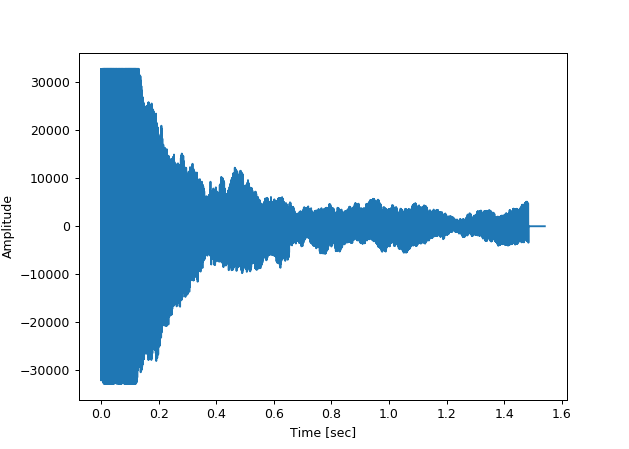

Text(0, 0.5, 'Amplitude')

In [6]:
fs,y = wf.read(filename)

# falla en mi ordenador de la uni, probar en casa 
#sd.play(y,fs)

# modifico la señal de audio para quedarnos con lo que nos interesa 
# creo el vector para poder representarlo (el eje)
if len(y.shape) > 1:
    y = y[:,0]

t = np.arange(0,len(y))/fs

# para representar
plt.figure(figsize = (7,5))
plt.plot(t, y)
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')

<IPython.core.display.Javascript object>


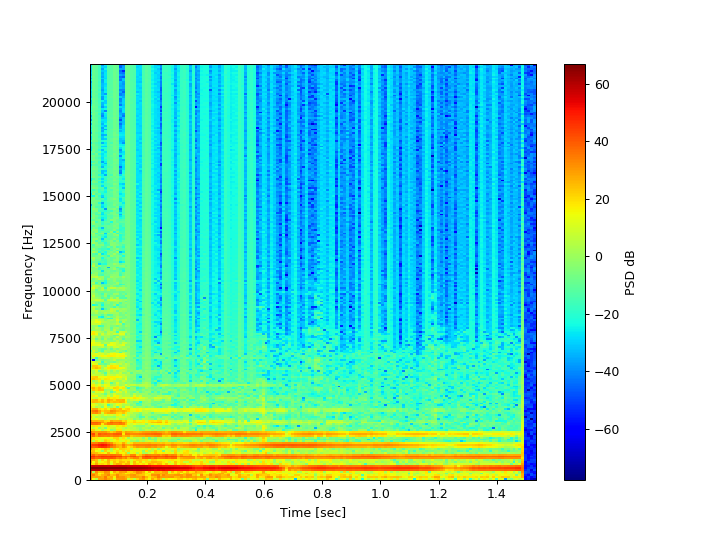

In [7]:
# resolución del espectograma en banda ancha 
N = int(0.010*fs)
tds_utils.my_spectrogram(y,N,fs)

## 4 
Enventanamos la señal, obtenemos la densidad espectral de la señal con tds_utils, representamos el espectro y obtenemos la frecuencia fundamental a a partir de este. 

<IPython.core.display.Javascript object>


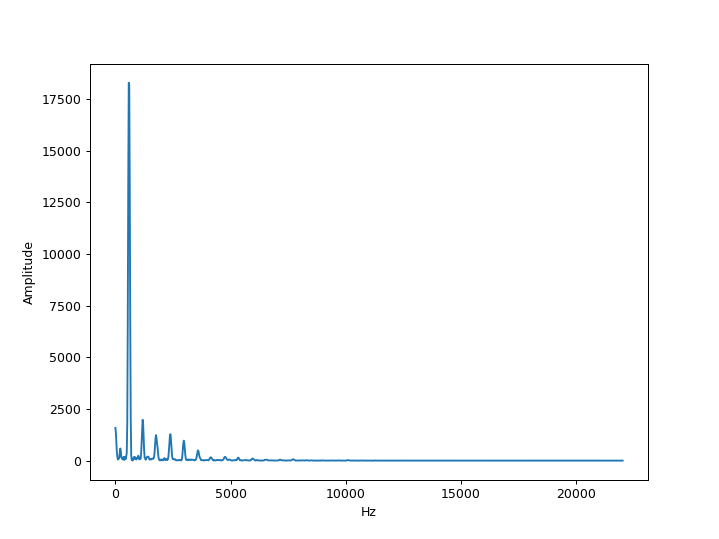

581.396484375
581.396484375


In [10]:
s = y[100:1000]
psd,f = tds_utils.my_spectra(s,fs)

idx = f >= 0
plt.figure(figsize=(8,6))
plt.xlabel('Hz')
plt.ylabel('Amplitude')
plt.plot(f[idx],psd[idx])

max = np.argmax(psd)
fc = abs(f[max])
print(fc)

peaks, propieties = ss.find_peaks(psd, height=10000)
peak = peaks[0]
fc = abs(f[peak])

print(fc)

## 5 
Comparo la frecuencia de la nota con mi diccionario de umbrales que me he creado al principio. 
Primero decidimos en que octava está la nota (margen más amplio) y depués nos recorremos los umbrales de esa octava para clasificarla mediante dos umbrales. 

In [9]:
i = 0
while i <= len(thresholds) - 1:
    if i == OCTAVES_NUM - 1: 
        if fc > thresholds[i]['Do'][0] and fc < TH_MAX: 
            octave = i + 1
            break
    else: 
        if fc > thresholds[i]['Do'][0] and fc < thresholds[i+1]['Do'][0]:
            octave = i + 1
            break
        else: 
            i += 1

for note in NOTES:
    th_inf = thresholds[i][note][0]
    if fc > th_inf and note != 'Si':
        note_ant = note
    elif fc > th_inf and note == 'Si':
        print(str(round(fc, 2)) + ' Es un ' + note + ' octava ' + str(octave))
    else: 
        print(str(round(fc, 2)) + ' Es un ' + note_ant + ' octava ' + str(octave))
        break


581.4 Es un Re octava 5
